<a href="https://colab.research.google.com/github/vvsrupesh/Colab-Notebooks/blob/main/Statistical_thinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
churn_master_df =pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [ ]:
churn_df = churn_master_df.copy()

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [ ]:
churn_df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
tenure,0
ServiceCount,0
Contract,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,27
Churn,0


In [ ]:
print("Rows          :" ,churn_df.shape[0])
print("Columns       :" ,churn_df.shape[1])
print("\nFeatures      \n:" ,churn_df.columns.tolist())
print("\nMissing values:" ,churn_df.isnull().sum().values)
print("\nUnique values :\n" ,churn_df.nunique())

Rows          : 7043
Columns       : 10

Features      
: ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: [ 0  0  0  0  0  0  0  0 27  0]

Unique values :
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [ ]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


In [ ]:
churn_df[churn_df['tenure']==0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [ ]:
churn_df['TotalCharges'].describe()

,TotalCharges
count,7016.000000
mean,2282.589168
std,2265.506114
min,18.800000
25%,401.925000
50%,1397.100000
75%,3792.325000
max,8684.800000


In [ ]:
churn_df[churn_df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


<Axes: xlabel='TotalCharges', ylabel='Churn'>

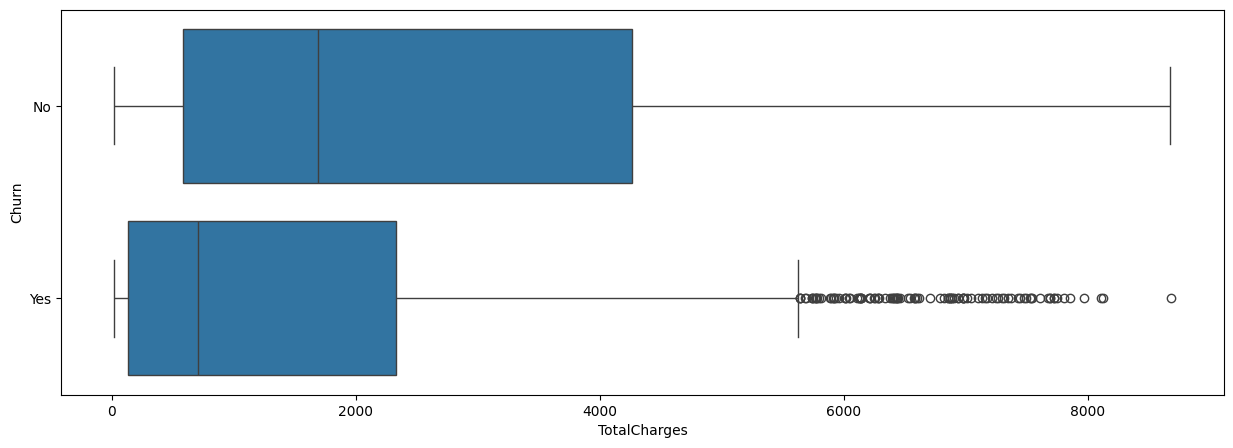

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x ="TotalCharges", y ="Churn", data =churn_df)

<ipython-input-70-cd64acde09f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_df['TotalCharges'], hist=True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

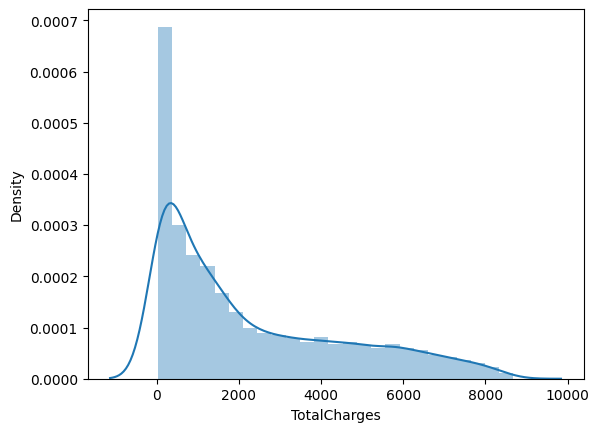

In [ ]:
sns.distplot(churn_df['TotalCharges'], hist=True)

<ipython-input-71-2c8325c09f06>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_df['TotalCharges'].apply(np.sqrt), hist=True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

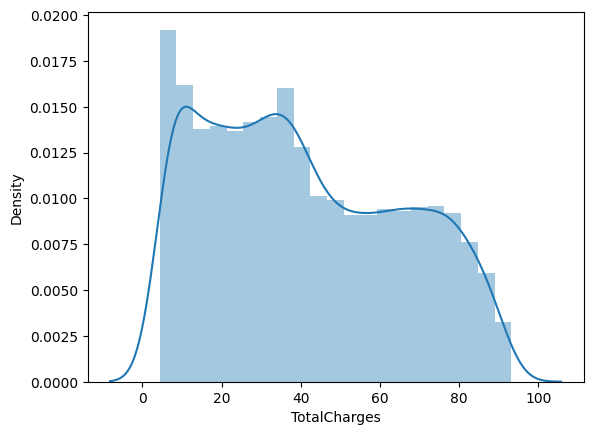

In [ ]:
sns.distplot(churn_df['TotalCharges'].apply(np.sqrt), hist=True)

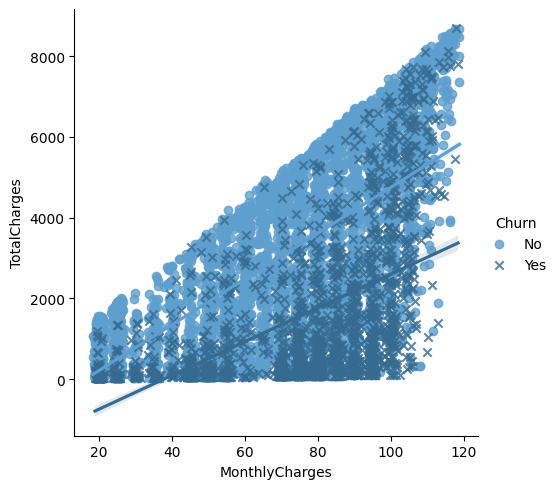

In [ ]:
sns.lmplot(x= 'MonthlyCharges', y = 'TotalCharges', data=churn_df, fit_reg=True, hue ="Churn", markers =["o","x"], palette="Blues_d")

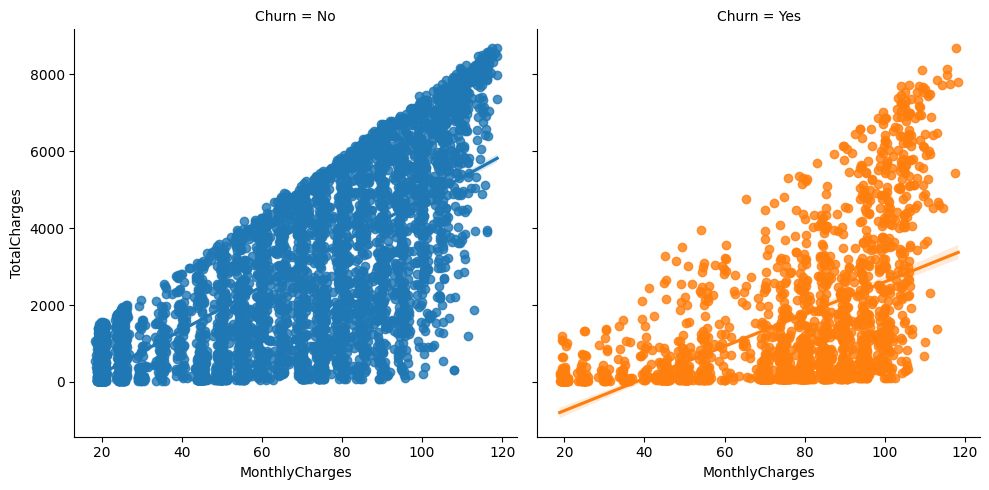

In [ ]:
sns.lmplot(x= 'MonthlyCharges', y = 'TotalCharges', data=churn_df, fit_reg=True,  col= 'Churn',hue ="Churn",)

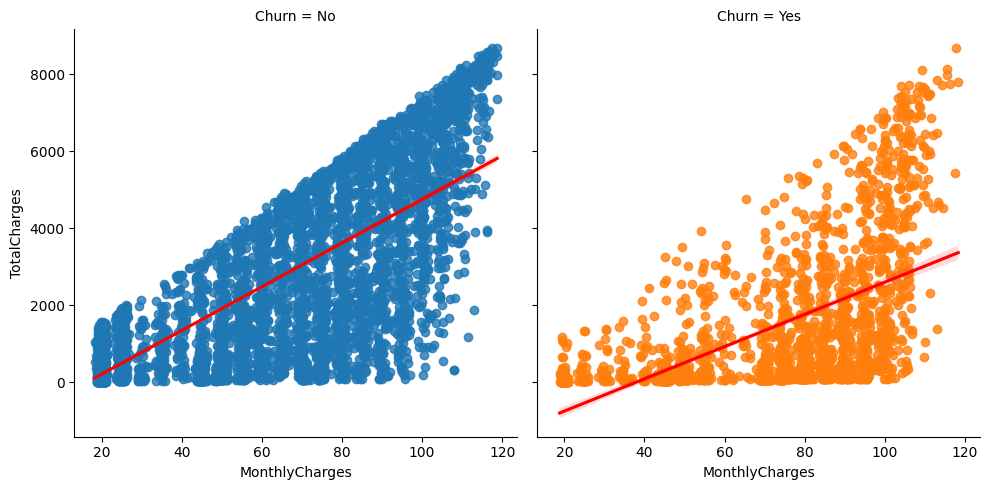

In [ ]:
sns.lmplot(x= 'MonthlyCharges', y = 'TotalCharges', data=churn_df, fit_reg=True, col= 'Churn', hue ="Churn", line_kws =({'color':'red'}))

In [ ]:
churn_df[['TotalCharges', 'MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


In [ ]:
churn_df[churn_df['Churn']=='No'][['TotalCharges', 'MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


In [ ]:
churn_no_df = churn_df[(churn_df['Churn']=='No') & (churn_df['TotalCharges'].isna()== False)]
churn_no_df.shape[0]

5147

In [ ]:
churn_no_df.head(50)

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No
9,6388-TABGU,Male,0,62,4,One year,No,56.15,3487.95,No
10,9763-GRSKD,Male,0,13,3,Month-to-month,Yes,49.95,587.45,No
11,7469-LKBCI,Male,0,16,7,Two year,No,18.95,326.80,No
12,8091-TTVAX,Male,0,58,6,One year,No,100.35,5681.10,No
14,5129-JLPIS,Male,0,25,7,Month-to-month,Yes,105.50,2686.05,No


In [ ]:
churn_no_df.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
tenure,False
ServiceCount,False
Contract,False
PaperlessBilling,False
MonthlyCharges,False
TotalCharges,False
Churn,False


In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['MonthlyCharges'], churn_no_df['TotalCharges'])

In [ ]:
print("slope           :", slope)
print("intercept       :", intercept)
print("r_value         :", r_value)
print("p_value         :", p_value)
print("std_err         :", std_err)
print("r_squared       :", r_value**2)

slope           : 56.73637552696062
intercept       : -922.8160085118097
r_value         : 0.7573902887184033
p_value         : 0.0
std_err         : 0.6819261867835148
r_squared       : 0.5736400494449463


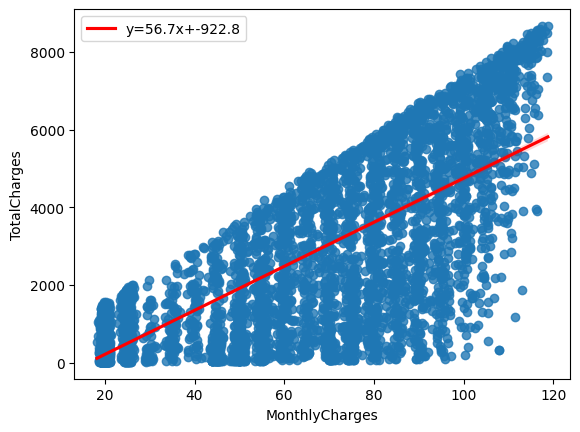

In [ ]:
ax= sns.regplot(x='MonthlyCharges', y ='TotalCharges',data= churn_no_df, line_kws={'color':'red', 'label' :'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

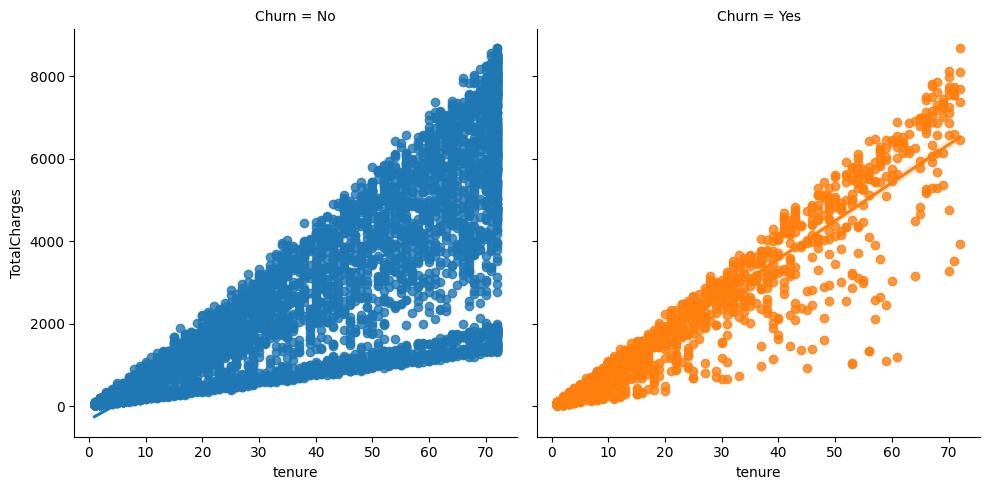

In [ ]:
sns.lmplot(x='tenure', y ='TotalCharges', data=churn_df, fit_reg=True, hue ="Churn", col= 'Churn')

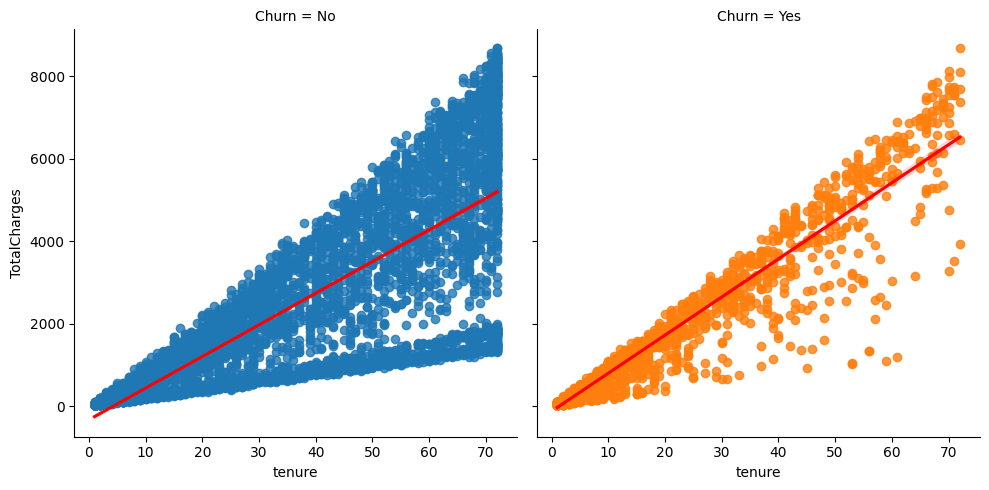

In [ ]:
sns.lmplot(x='tenure', y ='TotalCharges', data=churn_df, fit_reg=True, hue ="Churn", col= 'Churn', line_kws =({'color':'red'}))

In [ ]:
churn_df[['TotalCharges', 'tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.826066
tenure,0.826066,1.000000


In [ ]:
churn_df[churn_df['Churn']=='No'][['TotalCharges', 'tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.793288
tenure,0.793288,1.000000


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['tenure'], churn_no_df['TotalCharges'])

In [ ]:
print("slope           :", slope)
print("intercept       :", intercept)
print("r_value         :", r_value)
print("p_value         :", p_value)
print("std_err         :", std_err)
print("r_squared       :", r_value**2)

slope           : 76.74259761920021
intercept       : -334.08560506046933
r_value         : 0.793287728023258
p_value         : 0.0
std_err         : 0.8211475250987232
r_squared       : 0.6293054194323026


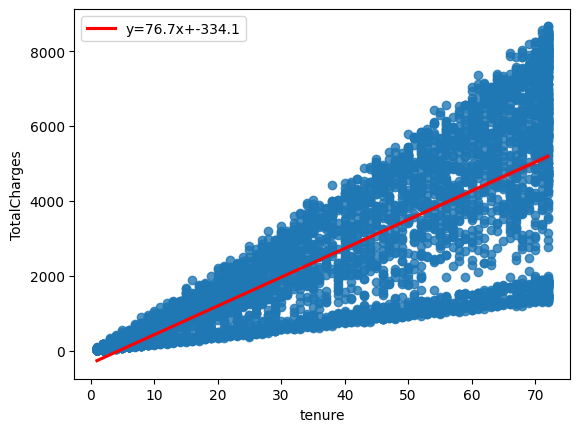

In [ ]:
ax= sns.regplot(x='tenure', y ='TotalCharges',data= churn_no_df, line_kws={'color':'red', 'label' :'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

In [ ]:
churn_no_df['tenure_Charges']=churn_no_df['tenure']*churn_no_df['MonthlyCharges']

<ipython-input-89-60f74427910a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_no_df['tenure_Charges']=churn_no_df['tenure']*churn_no_df['MonthlyCharges']


In [ ]:
churn_no_df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_Charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50
...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,72,7,Two year,Yes,21.15,1419.40,No,1522.80
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No,2035.20
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No,7430.40
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No,325.60


In [ ]:
churn_no_df[churn_no_df['Churn']=='No'][['TotalCharges', 'tenure_Charges']].corr()

,TotalCharges,tenure_Charges
TotalCharges,1.000000,0.999535
tenure_Charges,0.999535,1.000000


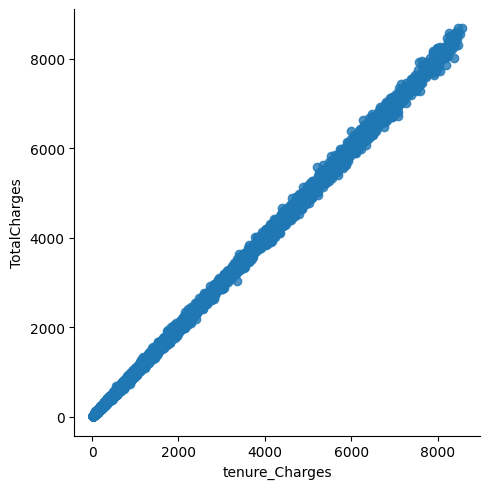

In [ ]:
sns.lmplot(x='tenure_Charges', y ='TotalCharges', data=churn_no_df)

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['tenure_Charges'], churn_no_df['TotalCharges'])

In [ ]:
print("slope           :", slope)
print("intercept       :", intercept)
print("r_value         :", r_value)
print("p_value         :", p_value)
print("std_err         :", std_err)
print("r_squared       :", r_value**2)

slope           : 1.0001720821518205
intercept       : -0.3010983695039613
r_value         : 0.9995350350972924
p_value         : 0.0
std_err         : 0.00042536192429779864
r_squared       : 0.9990702863869455


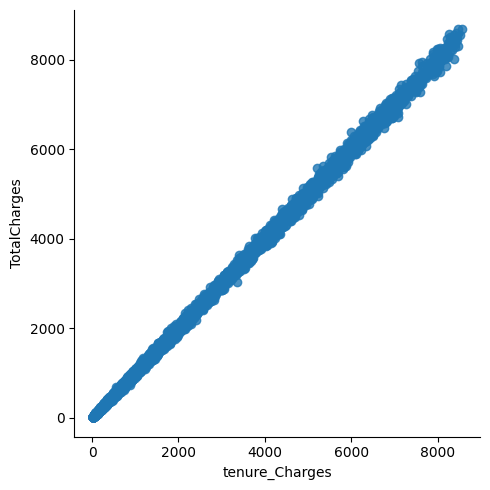

In [ ]:
sns.lmplot(x='tenure_Charges', y = 'TotalCharges', data= churn_no_df)

In [ ]:
print("slope           :", slope)
print("intercept       :", intercept)
print("r_value         :", r_value)
print("p_value         :", p_value)
print("std_err         :", std_err)
print("r_squared       :", r_value**2)

slope           : 1.0001720821518205
intercept       : -0.3010983695039613
r_value         : 0.9995350350972924
p_value         : 0.0
std_err         : 0.00042536192429779864
r_squared       : 0.9990702863869455


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['tenure_Charges'], churn_no_df['TotalCharges'])

In [ ]:
print("slope           :", slope)
print("intercept       :", intercept)
print("r_value         :", r_value)
print("p_value         :", p_value)
print("std_err         :", std_err)
print("r_squared       :", r_value**2)

slope           : 1.0001720821518205
intercept       : -0.3010983695039613
r_value         : 0.9995350350972924
p_value         : 0.0
std_err         : 0.00042536192429779864
r_squared       : 0.9990702863869455


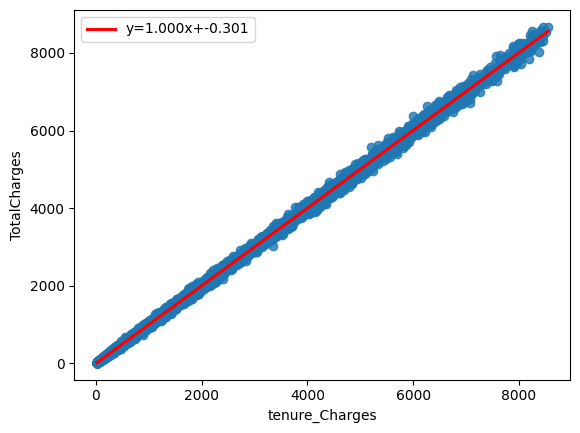

In [ ]:
ax= sns.regplot(x='tenure_Charges', y ='TotalCharges',data= churn_no_df, line_kws={'color':'red', 'label' :'y={0:.3f}x+{1:.3f}'.format(slope,intercept)})
ax.legend(loc="best")